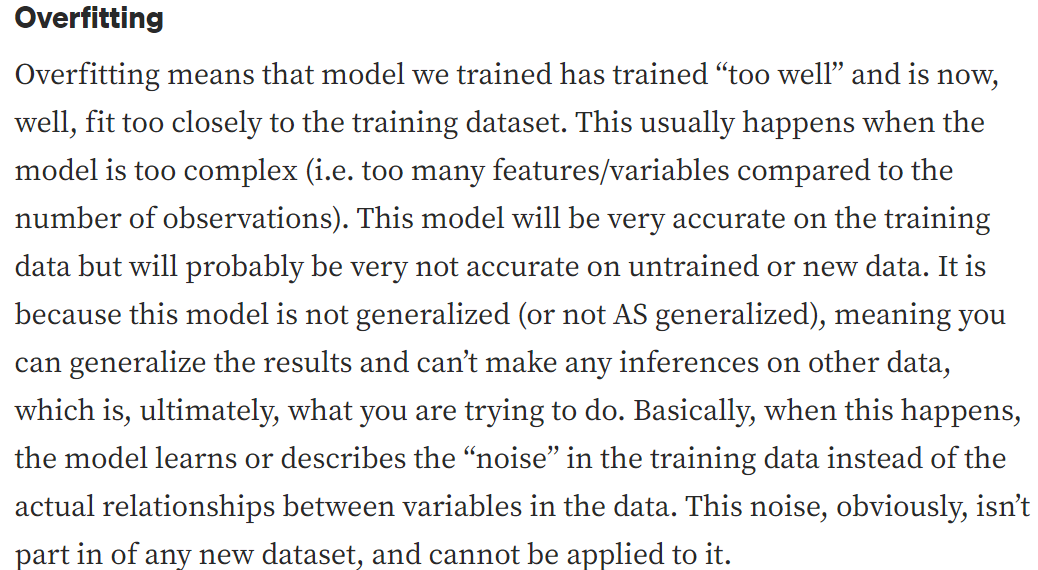

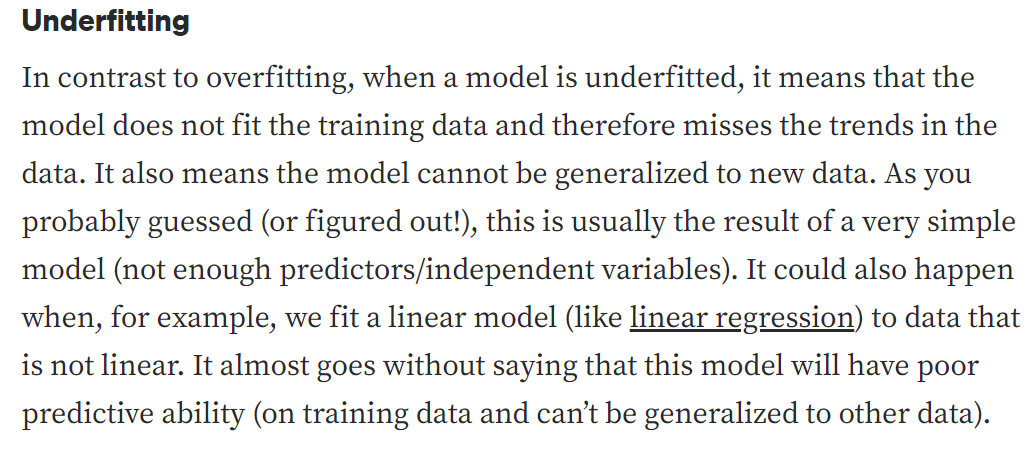

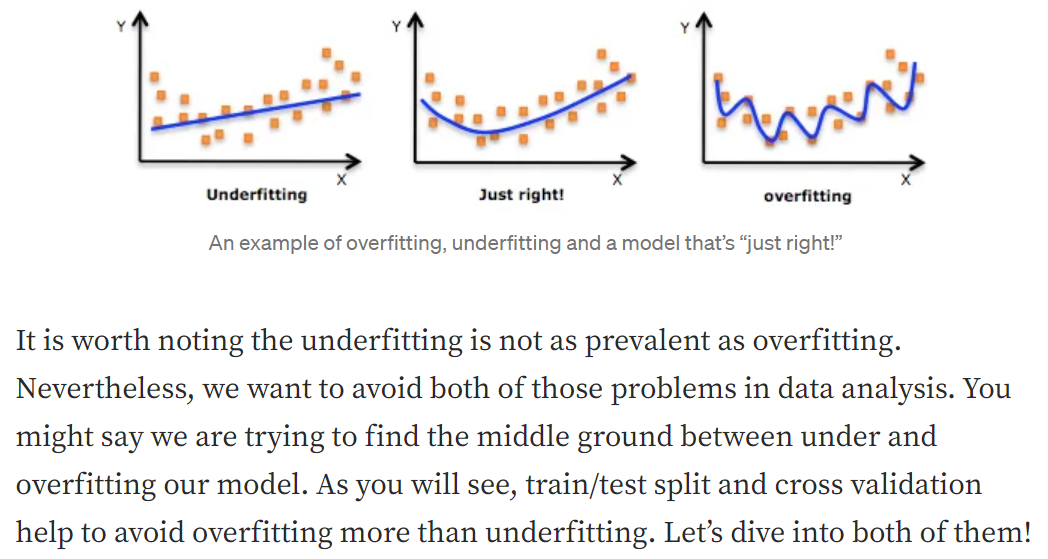

In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [11]:
# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn


In [13]:
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y


In [8]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [9]:
X_train[0:5]

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
421,0.038076,0.050680,0.016428,0.021872,0.039710,0.045032,-0.043401,0.071210,0.049770,0.015491
271,0.038076,0.050680,0.008883,0.042529,-0.042848,-0.021042,-0.039719,-0.002592,-0.018114,0.007207
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
181,0.048974,-0.044642,-0.042852,-0.053870,0.045213,0.050042,0.033914,-0.002592,-0.025953,-0.063209
191,-0.005515,0.050680,-0.041774,-0.043542,-0.079998,-0.076156,-0.032356,-0.039493,0.010227,-0.009362


In [18]:
y_train[0:5]

array([127., 140.,  79., 158., 185.])

In [19]:
X_test[0:5]

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
111,0.019913,-0.044642,0.004572,-0.026328,0.023198,0.010273,0.067048,-0.039493,-0.023645,-0.046641
380,0.016281,-0.044642,0.026128,0.058596,-0.060735,-0.044215,-0.013948,-0.033958,-0.051401,-0.025930
115,-0.030942,0.050680,0.001339,-0.005671,0.064477,0.049416,-0.047082,0.108111,0.083797,0.003064
259,0.012648,-0.044642,-0.036385,0.042530,-0.013953,0.012934,-0.026833,0.005157,-0.043985,0.007207
246,0.041708,-0.044642,-0.032073,-0.061904,0.079612,0.050982,0.056003,-0.009972,0.045066,-0.059067


In [20]:
y_test[0:5] 

array([ 59.,  52., 229.,  50.,  78.])

In [15]:
# fit a model

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

# predict a model
predictions = lm.predict(X_test)

In [28]:
#  we’re fitting the model on the training data and trying to predict the test data.

predictions[0:5]

array([118.08983319, 173.90049461, 197.06277823, 139.83279179,
       114.45006001])

In [29]:
predictions[:]

array([118.08983319, 173.90049461, 197.06277823, 139.83279179,
       114.45006001, 135.79018004, 139.22615076, 149.3292303 ,
       141.60954482, 179.19894614, 154.30834226,  60.87714957,
       159.60076276, 244.44704797, 130.47391734, 255.05879485,
       205.67259701, 237.60680153, 153.91826281, 121.79832338,
       165.13275485,  27.13688234, 103.55083053, 245.69678712,
       124.41678887,  85.44455529, 158.61701306,  73.17148217,
       289.44238931,  93.92877523, 118.30103498, 132.00448675,
        42.33805408, 109.21174331, 158.57402011, 180.26057722,
       240.38184771, 111.2464986 , 246.89749556, 117.51209399,
        81.65663558,  38.51903881, 133.55028915, 225.75431073,
       104.29004947,  92.56122458, 108.55203745, 195.91614097,
        57.7526421 , 194.17769459,  71.37778893, 174.67169883,
       214.04181937, 203.14294473, 214.04123759, 124.82519927,
        77.62210989, 109.00710972, 173.06646269, 196.02158762,
       180.00216864,  70.58181368, 104.91880135, 180.10

Text(0, 0.5, 'Predictions')

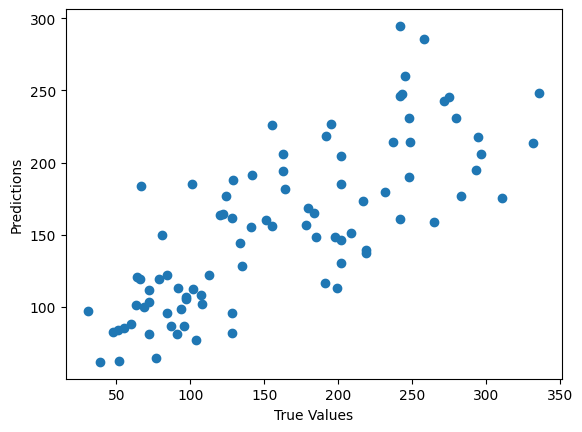

In [18]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [20]:
print ("Score:", model.score(X_test, y_test))

Score: 0.5841848462355304


Here is a summary of what we did: We’ve loaded in the data, split it into a training and testing sets, fitted a regression model to the training data, made predictions based on this data and tested the predictions on the test data

In [26]:
# Use lmplot for Predictions vs True Values
# Get all the coefficients and the intercept using statsmodel.

## Cross Validation

We can perform something called cross validation. It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.

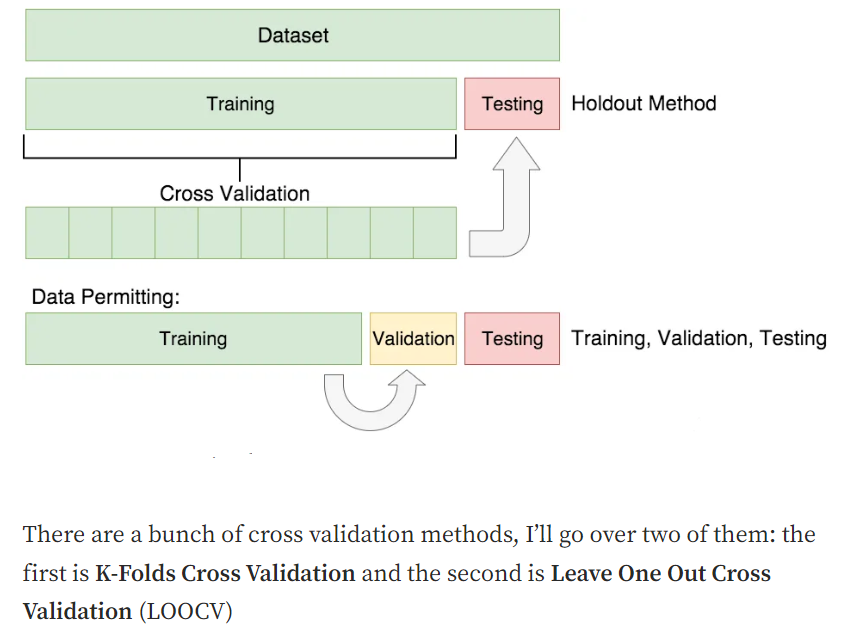

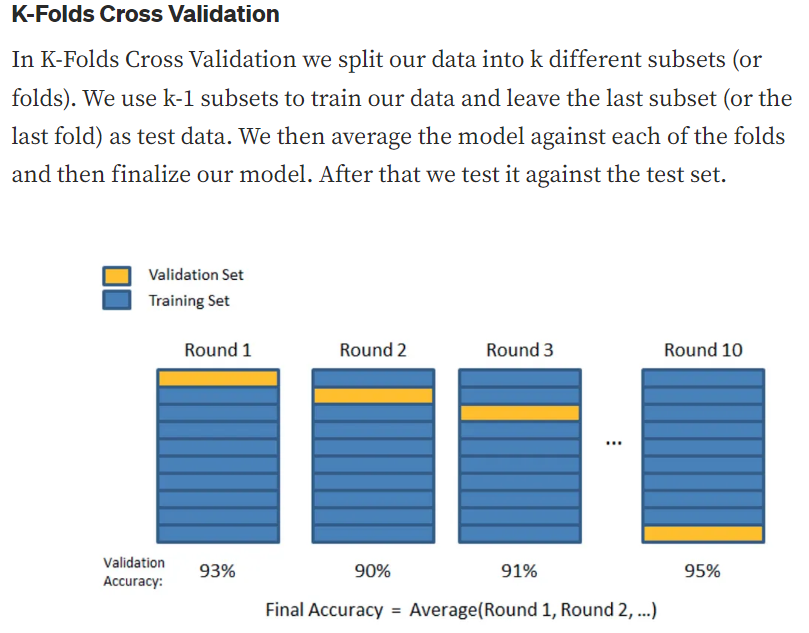

As you can see, the function split the original data into different subsets of the data. Again, very simple example but I think it explains the concept pretty well.

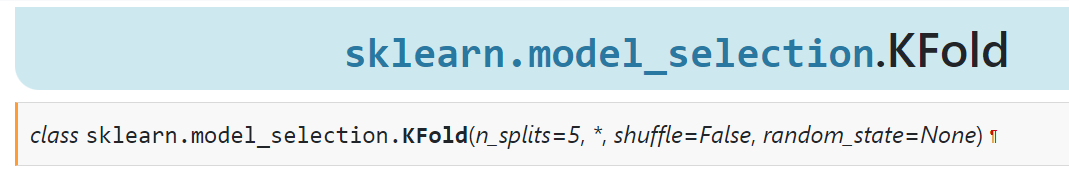

In [21]:
# from sklearn.metrics import accuracy_scor

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

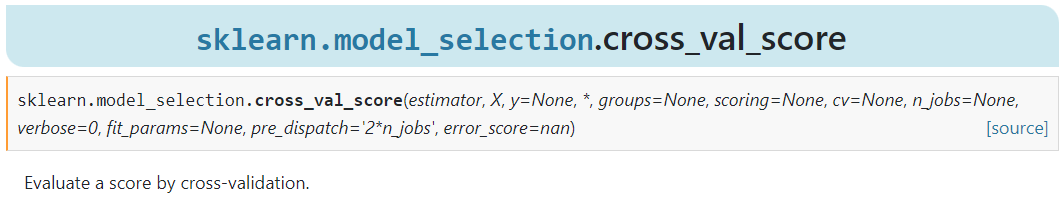

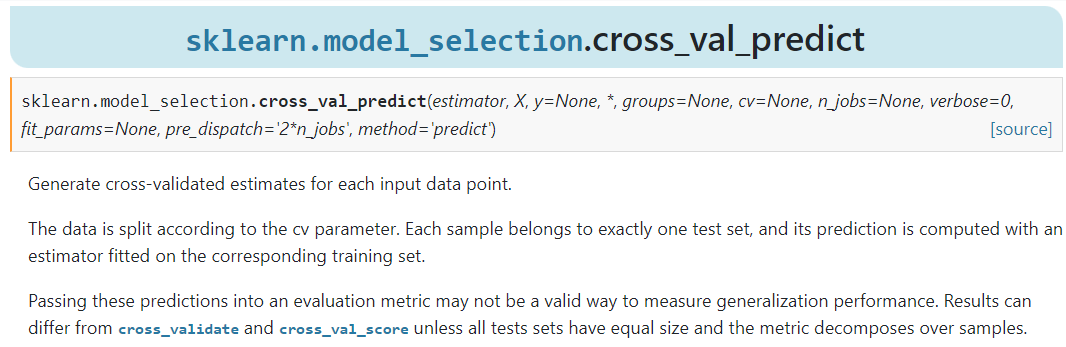

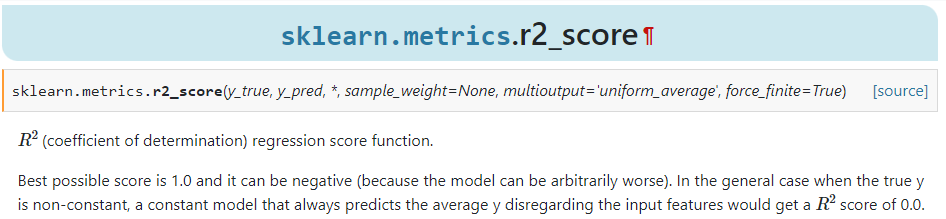

In [33]:
# Perform 6-fold cross validation

scores = cross_val_score(model, df, y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


As you can see, the last fold improved the score of the original model.

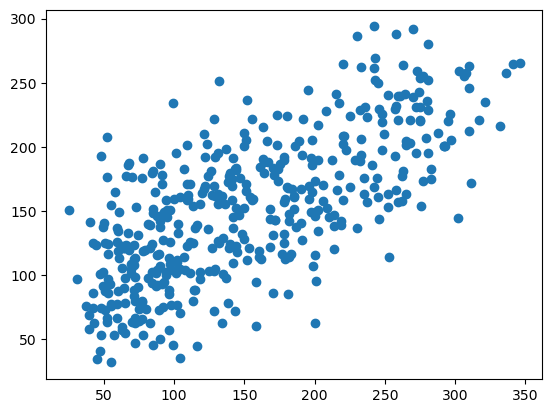

In [34]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

You can see it’s very different from the original plot from earlier. It is six times as many points as the original plot because I used cv=6.

Finally, let’s check the R² score of the model (R² is a “number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s)”. Basically, how accurate is our model):

In [35]:
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.4908065838640775
